# Image Mosaic

### Introduction
In this project, we use a set of images to reconstruct the target image. In other words, the target image is composed by not the original pixels, but other images. The big picture will not be changed, which means, we can still verify the original information visually. 

In [7]:
#####################################
#Note: When pix = 8 and the input size of the image is 1080*1440, it will take about 10 minutes to get the result.
#####################################
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random
from PIL import Image
import matplotlib

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### Dataset preprocessing

In [8]:
# Read dataset
IMDIR1="/cifar-10-batches-py/data_batch_1"
dict1 = unpickle (IMDIR1)
temps = dict1[b'data']

row,column = temps.shape
database_shape = np.zeros((row,3,1024),dtype = np.int)
small_image_shape = np.zeros((row,3,256),dtype = np.int)
for i in range(row):
    a = 0
    for j in range(3):
        database_shape[i,j,:] = temps[i,a:a+1024]
        a = a+1024

# Compressing the image from database: from 32*32 to 16*16
for i in range(row):
    print('Database processing...',round(100*i/row),'%')
    for j in range(3):
        for k in range(256):
            flag = 8*k
            if flag in range(1,31,2) :
                small_image_shape[i,j,k] = (database_shape[i,j,4*k] + database_shape[i,j,4*k+1] + database_shape[i,j,4*k+32] + database_shape[i,j,4*k+33])//4
            small_image_shape[i,j,k] = (database_shape[i,j,2*k] + database_shape[i,j,2*k+1] + database_shape[i,j,2*k+32] + database_shape[i,j,2*k+33])//4
            
        
              
patch = np.zeros((row,16,16,3),dtype=np.int)
patch[:,:,:,0] = np.reshape(small_image_shape[:,0,:],(row,16,16))
patch[:,:,:,1] = np.reshape(small_image_shape[:,1,:],(row,16,16))
patch[:,:,:,2] = np.reshape(small_image_shape[:,2,:],(row,16,16))
patch = patch.astype(np.uint8)

print('Database process completed.')

Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
Database processing... 0 %
D

Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
Database processing... 4 %
D

Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
Database processing... 7 %
D

Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing... 11 %
Database processing.

Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 14 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing... 15 %
Database processing.

Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing... 18 %
Database processing.

Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 21 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing... 22 %
Database processing.

Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing... 25 %
Database processing.

Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing... 28 %
Database processing.

Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing... 31 %
Database processing.

Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing... 34 %
Database processing.

Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing... 38 %
Database processing.

Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing... 41 %
Database processing.

Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing... 44 %
Database processing.

Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing... 47 %
Database processing.

Database processing... 50 %
Database processing... 50 %
Database processing... 50 %
Database processing... 50 %
Database processing... 50 %
Database processing... 50 %
Database processing... 50 %
Database processing... 50 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing... 51 %
Database processing.

Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing... 54 %
Database processing.

Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing... 58 %
Database processing.

Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing... 61 %
Database processing.

Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing... 64 %
Database processing.

Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing... 67 %
Database processing.

Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing... 70 %
Database processing.

Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 73 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing... 74 %
Database processing.

Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 76 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing... 77 %
Database processing.

Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing... 80 %
Database processing.

Database processing... 83 %
Database processing... 83 %
Database processing... 83 %
Database processing... 83 %
Database processing... 83 %
Database processing... 83 %
Database processing... 83 %
Database processing... 83 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing... 84 %
Database processing.

Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing... 87 %
Database processing.

Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing... 91 %
Database processing.

Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing... 94 %
Database processing.

Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing... 97 %
Database processing.

In [9]:
#####################################
# input image
#####################################


IMDIR0 = "test.jpg"
image = io.imread(IMDIR0)
row_1,column_1 = image[:,:,1].shape


###############################
## change the value of pix here before using
###############################
# the size of patches to be replaced
pix = 8
row_1 = row_1//pix
column_1 = column_1//pix


r_image = np.zeros((row_1, column_1), dtype=np.int)
g_image = np.zeros((row_1, column_1), dtype=np.int)
b_image = np.zeros((row_1, column_1), dtype=np.int)
Image_output = np.zeros((row_1*16, column_1*16,3), dtype=np.int)
image_most = np.zeros((row, 3), dtype=np.int)
for a in range(row):
    image_most[a,0] = np.mean(patch[a,:,:,0])
    image_most[a,1] = np.mean(patch[a,:,:,1])
    image_most[a,2] = np.mean(patch[a,:,:,2])
    
print('Input image processing completed.')

Input image processing completed.


In [10]:
#####################################
#The matching and replacing part
#####################################
for i in range(row_1):
    print('In progress...',round(100*i/row_1),'%')
    for j in range(column_1):
        r_image[i,j] = np.mean(image[(pix*i):(pix*i+pix),(pix*j):(pix*j+pix),0])
        g_image[i,j] = np.mean(image[(pix*i):(pix*i+pix),(pix*j):(pix*j+pix),1])
        b_image[i,j] = np.mean(image[(pix*i):(pix*i+pix),(pix*j):(pix*j+pix),2])
        min_rgb = 10000;
        index = 0
        for k in range(row):
            r = (r_image[i,j]-image_most[k,0])**2
            g = (g_image[i,j]-image_most[k,1])**2
            b = (b_image[i,j]-image_most[k,2])**2
            if min_rgb >= r+g+b:
                min_rgb = r+g+b
                index = k
        Image_output[16*i:16*(i+1),16*j:16*(j+1),:]=patch[index,:,:,:]

        
print('Replacing is done.')

In progress... 0 %
In progress... 1 %
In progress... 1 %
In progress... 2 %
In progress... 2 %
In progress... 3 %
In progress... 4 %
In progress... 4 %
In progress... 5 %
In progress... 6 %
In progress... 6 %
In progress... 7 %
In progress... 8 %
In progress... 8 %
In progress... 9 %
In progress... 9 %
In progress... 10 %
In progress... 11 %
In progress... 11 %
In progress... 12 %
In progress... 12 %
In progress... 13 %
In progress... 14 %
In progress... 14 %
In progress... 15 %
In progress... 16 %
In progress... 16 %
In progress... 17 %
In progress... 18 %
In progress... 18 %
In progress... 19 %
In progress... 19 %
In progress... 20 %
In progress... 21 %
In progress... 21 %
In progress... 22 %
In progress... 22 %
In progress... 23 %
In progress... 24 %
In progress... 24 %
In progress... 25 %
In progress... 26 %
In progress... 26 %
In progress... 27 %
In progress... 28 %
In progress... 28 %
In progress... 29 %
In progress... 29 %
In progress... 30 %
In progress... 31 %
In progress... 3

Image has been saved successfully.


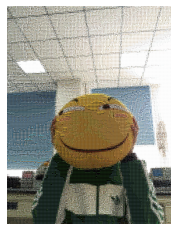

In [25]:
#####################################
#Print and Save image in current directory
#####################################


plt.imshow(Image_output)
plt.axis('off')

# This part save the output image as a file in the local directory with the name of 'output.jpg'
matplotlib.image.imsave('wow.png', Image_output.astype('uint8'))
print('Image has been saved successfully.')